## Cluster 별 특징 분석하기
- 피봇테이블 활용 -> 평균치 분석 및 비교
- 크로스탭 활용 -> 피쳐별 상관관계 및 요약

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import cluster
from sklearn import metrics
import pandas as pd
import pickle
%matplotlib inline

In [75]:
import pickle
with open('clustered.pickle', 'rb') as f:
    df_clustered = pickle.load(f)
df_clustered.head()

,Sex,Age,Income,Reason,Cost,Type,Traffic,With,Sleep,Cluster
0,1,3,3,1.0,9,1.0,1.0,1.0,2,1
1,1,6,4,2.0,10,1.0,2.0,1.0,2,1
2,2,2,3,2.0,6,2.0,1.0,2.0,2,2
3,1,4,3,2.0,2,1.0,1.0,2.0,2,2
4,2,3,4,4.0,6,1.0,1.0,2.0,3,1


### Feature 설명
- 성별 Sex : 1 남성 2 여성
- 소득 Income : 1-7
- 나이 Age : 1 -7
- reason 선정이유 : 1: 지명도 2:볼거리 3:여행가능시간 4:거리 
-   type 여행유형 : relax: 1, shop:2, exp: 3, watch: 4
-   교통 Traffic : 1 자동차 2 대중교통 3 기타
-   숙박 Sleep : 1 캠프   2 업체   3 무박기타
-   지출비용 Cost : 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 → qcut
-   동반자유형 With : 1 가족  2 친구연인  3단체기타

In [7]:
df_pivot = pd.pivot_table(df_clustered,
                    index = 'Cluster')
df_pivot.head()

,Age,Cost,Income,Reason,Sex,Sleep,Traffic,Type,With
Cluster,,,,,,,,,
0,6.563253,1.812249,1.506359,1.883534,1.731593,2.035810,1.087015,1.162651,1.366466
1,3.708639,8.226569,3.342298,1.945803,1.403830,2.068460,1.131214,1.430725,1.923390
2,2.930939,3.425414,2.770718,2.185083,1.348757,2.154696,1.106354,1.502072,1.957873


<br>

### 성별, 연령, 여행지지출, 소득 분석 및 시각화

- 피봇테이블 활용 -> 평균치 분석 및 비교
- Rader 그래프로 표현

In [8]:
df = df_pivot[['Sex', 'Age', 'Cost', 'Income']]
df.head()

,Sex,Age,Cost,Income
Cluster,,,,
0,1.731593,6.563253,1.812249,1.506359
1,1.403830,3.708639,8.226569,3.342298
2,1.348757,2.930939,3.425414,2.770718


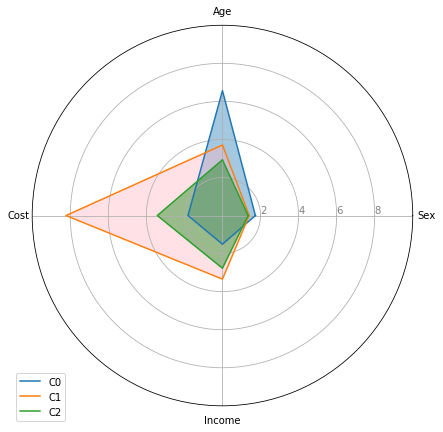

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

#figure & subplot
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(polar="True")

#categories
categories = ['Sex', 'Age', 'Cost', 'Income']
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# part 1

# value
values = df.loc[0].values.flatten().tolist()
values += values[:1]

ax.plot(angles, values, label = 'C0')
ax.fill(angles, values, alpha=0.4)


#part2
values2 = df.loc[1].values.flatten().tolist()
values2 += values2[:1]

ax.plot(angles, values2, label = 'C1')
ax.fill(angles, values2, 'lightpink', alpha=0.4)

#part3
values3 = df.loc[2].values.flatten().tolist()
values3 += values3[:1]

ax.plot(angles, values3, label = 'C2')
ax.fill(angles, values3, 'g', alpha=0.4)


#x, y ticks
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8], color='grey', size=10)
plt.ylim(0, 10)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

### 여행목적, 여행유형, 동반자 분석 및 시각화

- 크로스탭 활용 -> 피쳐별 상관관계 및 요약
- 클러스터 별 파이그래프로 퍼센테이지 분포 시각화

#### 목적 Reason 분석

In [12]:
df_reason = df_clustered[['Cluster','Reason']]
df_reason.head()

,Cluster,Reason
0,1,1.0
1,1,2.0
2,2,2.0
3,2,2.0
4,1,4.0


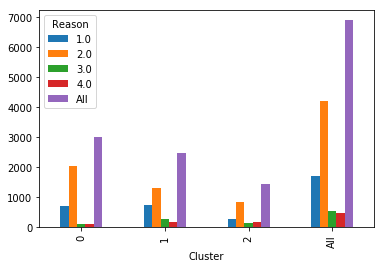

In [14]:
#corsstab 상관관계 분석 시각화
ct_rea = pd.crosstab( df_clustered.Cluster, df_clustered.Reason, margins=True)
ct_rea.plot.bar()

In [72]:
# 클러스터 별 퍼센테이지 구하기
ct_rea2 = pd.crosstab( df_clustered.Reason, df_clustered.Cluster, margins=True)
ct_rea2['0_per'] = ct_rea2[0]/2988*100
ct_rea2['1_per'] = ct_rea2[1]/2454*100
ct_rea2['2_per'] = ct_rea2[2]/1448*100
ct_rea2.head()

Cluster,0,1,2,All,0_per,1_per,2_per
Reason,,,,,,,
1.0,704,725,262,1691,23.560910,29.543602,18.093923
2.0,2050,1302,844,4196,68.607764,53.056235,58.287293
3.0,112,262,154,528,3.748327,10.676447,10.635359
4.0,122,165,188,475,4.082999,6.723716,12.983425
All,2988,2454,1448,6890,100.000000,100.000000,100.000000


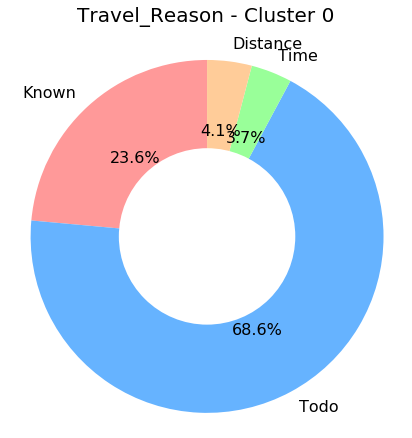

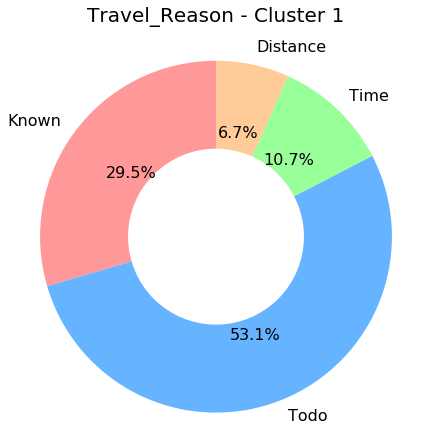

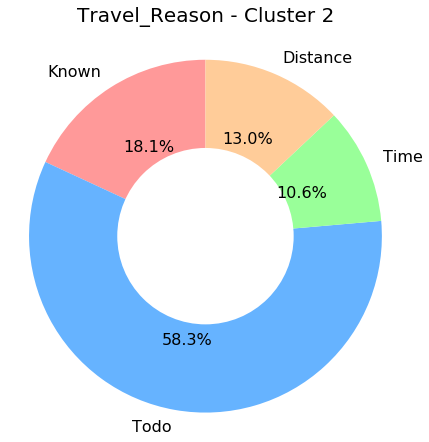

In [73]:
# 파이차트로 시각화
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.rc('font', size= 16)

fig = plt.figure(figsize=(7,7))
data = ct_rea2['0_per'][:4]
categories = ['Known', 'Todo', 'Time', 'Distance']
plt.pie(data, labels=categories, autopct='%0.1f%%', colors=colors, startangle=90)
plt.axis('equal')
plt.title('Travel_Reason - Cluster 0', position=(0.5, 1.0+0.05), fontsize=20)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show

# fig, axs = plt.subplots()
categories = ['Known', 'Todo', 'Time', 'Distance']

fig = plt.figure(figsize=(7,7))
data1 = ct_rea2['1_per'][:4]
plt.pie(data1, labels=categories, autopct='%0.1f%%', colors=colors, startangle=90)
plt.axis('equal')
plt.title('Travel_Reason - Cluster 1',  position=(0.5, 1.0+0.05), fontsize=20)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# fig, axs = plt.subplots()
fig = plt.figure(figsize=(7,7))
categories = ['Known', 'Todo', 'Time', 'Distance']
data2 = ct_rea2['2_per'][:4]
plt.pie(data2, labels=categories, autopct='%0.1f%%', colors=colors, startangle=90)
plt.axis('equal')
plt.title('Travel_Reason - Cluster 2',  position=(0.5, 1.0+0.05), fontsize=20)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

#### 유형 Type 분석

In [19]:
df_type = df_clustered[['Cluster','Type']]
df_type.head()

,Cluster,Type
0,1,1.0
1,1,1.0
2,2,2.0
3,2,1.0
4,1,1.0


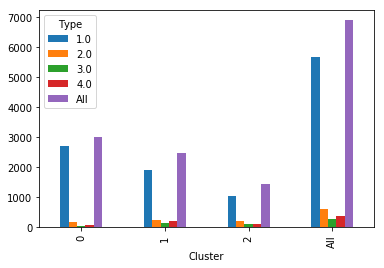

In [21]:
#corsstab 상관관계 분석 시각화
ct_rea = pd.crosstab( df_clustered.Cluster, df_clustered.Type, margins=True)
ct_rea.plot.bar()

In [76]:
# 클러스터 별 퍼센테이지 구하기
ct_rea2 = pd.crosstab( df_clustered.Type, df_clustered.Cluster, margins=True)
ct_rea2['0_per'] = ct_rea2[0]/2988*100
ct_rea2['1_per'] = ct_rea2[1]/2454*100
ct_rea2['2_per'] = ct_rea2[2]/1448*100
ct_rea2.head()


Cluster,0,1,2,All,0_per,1_per,2_per
Type,,,,,,,
1.0,2707,1903,1040,5650,90.595716,77.546862,71.823204
2.0,159,234,200,593,5.321285,9.535452,13.812155
3.0,39,128,97,264,1.305221,5.215974,6.698895
4.0,83,189,111,383,2.777778,7.701711,7.665746
All,2988,2454,1448,6890,100.000000,100.000000,100.000000


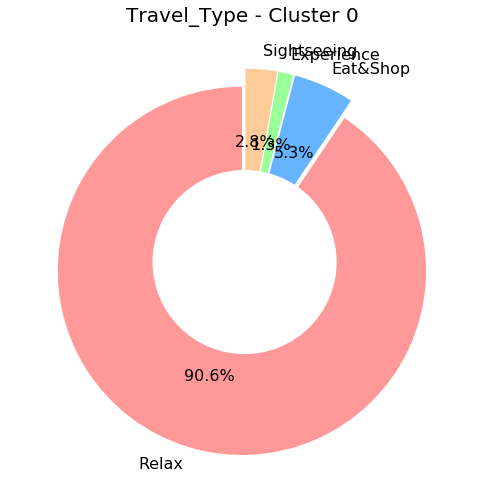

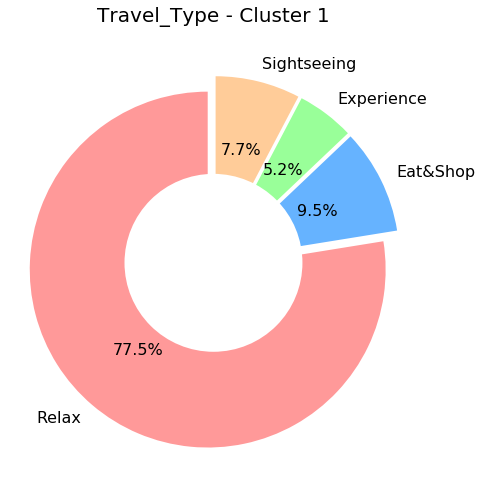

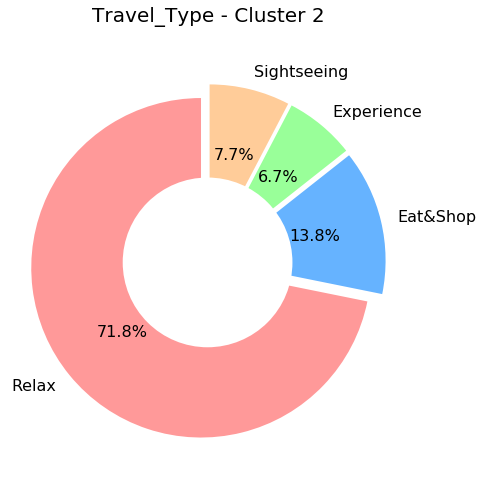

In [77]:
# 파이차트 시각화

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.rc('font', size= 16)
fig = plt.figure(figsize=(7,7))

data = ct_rea2['0_per'][:4]
categories = ['Relax', 'Eat&Shop', 'Experience', 'Sightseeing']
explode = (0.05,0.05,0.05,0.05)
plt.pie(data, labels=categories, autopct='%0.1f%%', colors=colors, startangle=90,explode = explode)
plt.axis('equal')
plt.title('Travel_Type - Cluster 0',  position=(0.5, 1.0+0.05), fontsize=20)
# centre_circle = plt.Circle((0,0),0.50,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

fig = plt.figure(figsize=(7,7))

data1 = ct_rea2['1_per'][:4]
plt.pie(data1, labels=categories, autopct='%0.1f%%', colors=colors, startangle=90, explode = explode)
plt.axis('equal')
plt.title('Travel_Type - Cluster 1',  position=(0.5, 1.0+0.05), fontsize=20)
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

fig = plt.figure(figsize=(7,7))
data2 = ct_rea2['2_per'][:4]
plt.pie(data2, labels=categories, autopct='%0.1f%%', colors=colors, startangle=90, explode = explode)
plt.axis('equal')
plt.title('Travel_Type - Cluster 2',  position=(0.5, 1.0+0.05), fontsize=20)
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


#### 동반자 With 분석

In [37]:
df_with = df_clustered[['Cluster','With']]
df_with.head()

,Cluster,With
0,1,1.0
1,1,1.0
2,2,2.0
3,2,2.0
4,1,2.0


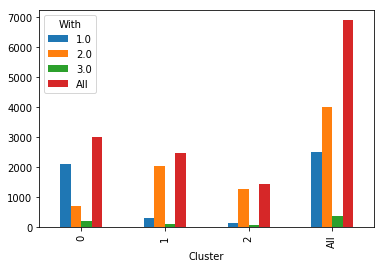

In [38]:
#corsstab 상관관계 분석 시각화
ct_rea = pd.crosstab( df_clustered.Cluster, df_clustered.With, margins=True)
ct_rea.plot.bar()

In [67]:
ct_rea2 = pd.crosstab( df_clustered.With, df_clustered.Cluster, margins=True)
ct_rea2['0_per'] = ct_rea2[0]/2988*100
ct_rea2['1_per'] = ct_rea2[1]/2454*100
ct_rea2['2_per'] = ct_rea2[2]/1448*100
ct_rea2.head()


Cluster,0,1,2,All,0_per,1_per,2_per
With,,,,,,,
1.0,2088,303,123,2514,69.879518,12.347188,8.494475
2.0,705,2036,1263,4004,23.594378,82.966585,87.223757
3.0,195,115,62,372,6.526104,4.686227,4.281768
All,2988,2454,1448,6890,100.000000,100.000000,100.000000


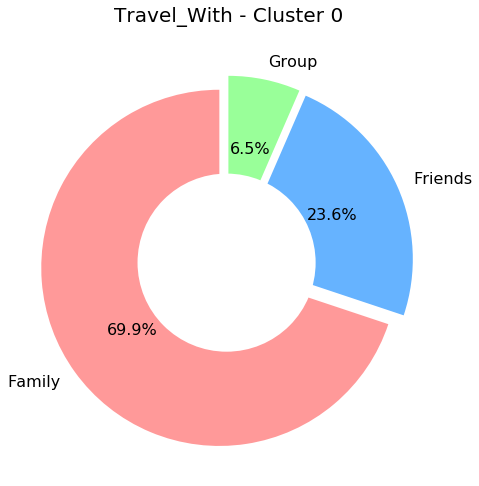

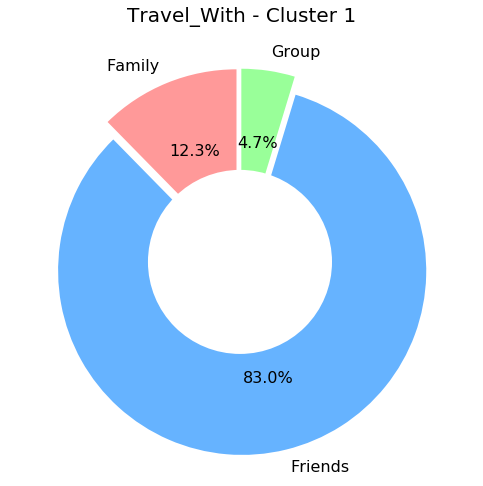

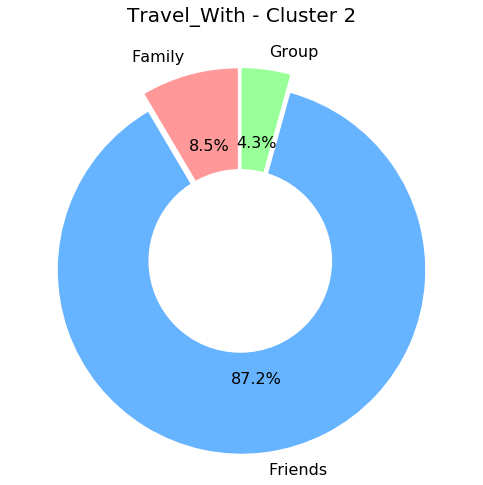

In [69]:
# 파이차트 시각화

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']





plt.rc('font', size= 16)

fig = plt.figure(figsize=(7,7))

data = ct_rea2['0_per'][:3]
categories = ['Family', 'Friends', 'Group']
explode = (0.05,0.05,0.05)
plt.pie(data, labels=categories, autopct='%0.1f%%', colors=colors, startangle=90, explode = explode)
plt.axis('equal')
plt.title('Travel_With - Cluster 0',position=(0.5, 1.0+0.05), fontsize=20)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(7,7))
data1 = ct_rea2['1_per'][:3]
plt.pie(data1, labels=categories, autopct='%0.1f%%', colors=colors, startangle=90, explode = explode)
plt.axis('equal')
plt.title('Travel_With - Cluster 1', position=(0.5, 1.0+0.05), fontsize=20)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(7,7))
data2 = ct_rea2['2_per'][:3]
plt.pie(data2, labels=categories, autopct='%0.1f%%', colors=colors, startangle=90, explode = explode)
plt.axis('equal')
plt.title('Travel_With - Cluster 2', position=(0.5, 1.0+0.05), fontsize=20)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()